In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
sns.set()

In [2]:
import plotly as py
# Import dependencies
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
# Configure Plotly to be rendered inline in the notebook.
py.offline.init_notebook_mode(connected=True)

In [3]:
import itertools
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df = pd.read_csv('HPD2.csv', parse_dates=['Date'])
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_1507,Whse_C,Category_019,2011-09-02,1250
1,Product_0608,Whse_C,Category_001,2011-09-27,5
2,Product_1933,Whse_C,Category_001,2011-09-27,23
3,Product_0875,Whse_C,Category_023,2011-09-30,5450
4,Product_0642,Whse_C,Category_019,2011-10-31,3


In [5]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [6]:
df.Product_Code.unique()

array(['Product_1507', 'Product_0608', 'Product_1933', ...,
       'Product_0465', 'Product_1013', 'Product_0853'], dtype=object)

In [7]:
df.Product_Category.unique()

array(['Category_019', 'Category_001', 'Category_023', 'Category_028',
       'Category_006', 'Category_007', 'Category_021', 'Category_004',
       'Category_015', 'Category_024', 'Category_030', 'Category_026',
       'Category_003', 'Category_018', 'Category_009', 'Category_032',
       'Category_011', 'Category_020', 'Category_013', 'Category_005',
       'Category_022', 'Category_031', 'Category_010', 'Category_033',
       'Category_017', 'Category_008', 'Category_029', 'Category_025',
       'Category_012', 'Category_014', 'Category_002', 'Category_027',
       'Category_016'], dtype=object)

In [8]:
df.nunique()

Product_Code        2160
Warehouse              4
Product_Category      33
Date                1712
Order_Demand        3282
dtype: int64

In [9]:
Category_001 = df.loc[df['Product_Category'] == 'Category_001']

In [10]:
Category_001['Date'].min(), Category_001['Date'].max()

(Timestamp('2011-09-27 00:00:00'), Timestamp('2017-01-06 00:00:00'))

# Data Preprocessing

In [11]:
cols = [ 'Product_Code', 'Warehouse', 'Product_Category']
Category_001.drop(cols, axis=1, inplace=True)
Category_001 = Category_001.sort_values('Date')
Category_001.isnull().sum()

Date            0
Order_Demand    0
dtype: int64

# Aggregate demand for Category 001 by year and month 

In [12]:
Category_001[['year','month']] = Category_001.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m").split(",")))
Category_001 = Category_001.groupby(['year', 'month', ])[['Order_Demand']].sum().reset_index()
Category_001=Category_001[['year', 'month', 'Order_Demand']]
Category_001

,year,month,Order_Demand
0,2011,09,28
1,2011,12,957
2,2012,01,22172
3,2012,02,25866
4,2012,03,30002
5,2012,04,20960
6,2012,05,20391
7,2012,06,21214
8,2012,07,20313
9,2012,08,18159


# Indexing with Time Series Data

In [13]:
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#Category_001 = Category_001.set_index('Date')
#Category_001.index
Category_001 = Category_001.drop(Category_001.index[[0,1]])
Category_001 = Category_001.drop(Category_001.index[[-1]])
Category_001

,year,month,Order_Demand
2,2012,01,22172
3,2012,02,25866
4,2012,03,30002
5,2012,04,20960
6,2012,05,20391
7,2012,06,21214
8,2012,07,20313
9,2012,08,18159
10,2012,09,19864
11,2012,10,27648


In [46]:
month = pd.date_range('20120101', periods = 60, freq = 'M')
month

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [82]:
Category_001['Timestamp'] = month
#y = Category_001.loc[:, ('Timestamp', 'Order_Demand')]
#y.head()
#y.describe()

In [83]:
Category_001 = Category_001.set_index('Timestamp')
Category_001.index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [86]:
y = Category_001.loc[:, ('Order_Demand')]
#y = Category_001.set_index('Order_Demand').resample('MS').mean()
y

Timestamp
2012-01-31    22172
2012-02-29    25866
2012-03-31    30002
2012-04-30    20960
2012-05-31    20391
2012-06-30    21214
2012-07-31    20313
2012-08-31    18159
2012-09-30    19864
2012-10-31    27648
2012-11-30    25078
2012-12-31    21271
2013-01-31    22281
2013-02-28    29030
2013-03-31    26776
2013-04-30    24464
2013-05-31    21452
2013-06-30    22989
2013-07-31    30267
2013-08-31    24993
2013-09-30    27373
2013-10-31    29258
2013-11-30    27088
2013-12-31    28882
2014-01-31    26276
2014-02-28    26665
2014-03-31    36264
2014-04-30    25970
2014-05-31    28438
2014-06-30    29207
2014-07-31    32801
2014-08-31    28950
2014-09-30    30246
2014-10-31    39195
2014-11-30    31200
2014-12-31    32328
2015-01-31    35569
2015-02-28    37465
2015-03-31    34587
2015-04-30    30803
2015-05-31    25452
2015-06-30    36159
2015-07-31    34183
2015-08-31    29797
2015-09-30    27524
2015-10-31    36550
2015-11-30    30568
2015-12-31    28926
2016-01-31    31214
2016-02-29

In [49]:
#y = Category_001['Order_Demand'].resample('MS').mean()

In [50]:
#df.index = pd.to_datetime(df.index, unit='s')

# Visualizing Furniture Sales Time Series Data

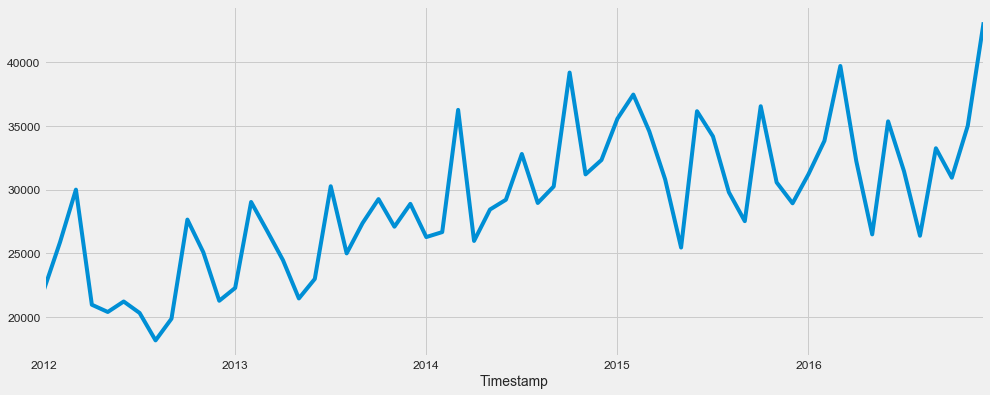

In [87]:
y.plot(figsize=(15, 6))
plt.show()

In [88]:
type(y)

pandas.core.series.Series

# Time-series decomposition plot

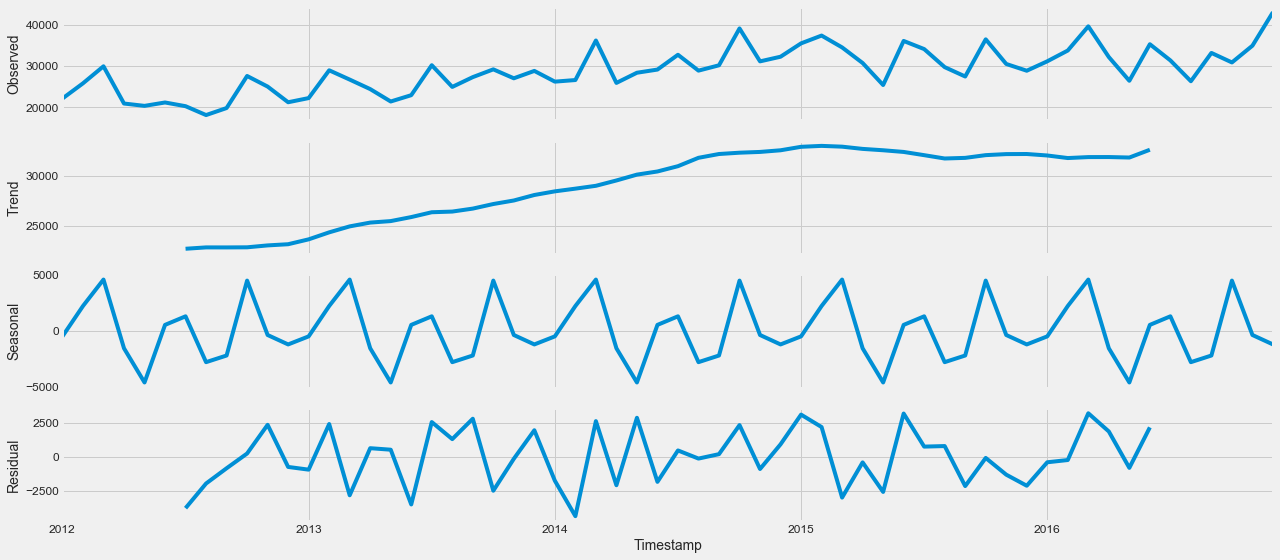

In [89]:

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
res = sm.tsa.seasonal_decompose(y.interpolate(), model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose.png', dpi=150)

# Time series forecasting with ARIMA

In [90]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Find the optimal set of parameters that yields the best performance for the  model

In [91]:
minn=1000000000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if float(results.aic)<minn:
                minn=float(results.aic)
                paramm=param
                param_seasonall=param_seasonal
        except:
            continue
print('lowest AIC value is ')
print('ARIMA{}x{}12 - AIC:{}'.format(paramm, param_seasonall, minn))

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1384.5013574610477
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1083.913040098839
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:942.4390582483262


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1185.7159305519572
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:954.8698329608205
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:938.4882241062174
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:724.5781974324176
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1269.5992471900065
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1323.4715859434257
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1046.0471599880216
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:921.3055361189919


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1178.9011473979363
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:956.1586508356244
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1041.6687280736417
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:722.3345076740904


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1107.9634522414938
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1155.072639660372
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:919.400190732718
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:930.9242208813536
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1303.3175869331285
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:936.4437299032916
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:916.5599592523129
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:700.138448218833


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1247.6767549894917
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1114.5902838355557
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:882.3208229753122
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:890.9093785728534


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:960.6250445310993
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:917.4485165620376
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:879.0670330071398
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:692.5609777212128


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1435.925399284364
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1176.4726752171937
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:940.5220045665517
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:937.8051364116122


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1259.1697510354102
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:936.3360137038926
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:939.0007517363811
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:697.285537930715


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1171.8372060049837
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1134.5929998936758
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:901.3829401505278


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:915.6664462401128


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1188.4844085809175
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:919.0428569367848
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:902.336550759041


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:689.6780446832137


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1889.7725811295934
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1151.344312265722
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:912.0616464840961
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:918.6843460198555


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1072.1578070793942
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:908.7832322984976
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:907.2818789323924


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:673.7085057680328


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1545.163393148109
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1116.468508981567
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:884.1949701986962
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:892.6594806297312


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1177.5175335614463
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:900.5103050505451
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:880.7968987652558
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:670.4542594479783


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1435.480643389632
lowest AIC value is 
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:670.4542594479783


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [92]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1104      0.301     -0.366      0.714      -0.701       0.480
ma.L1         -0.6857      0.277     -2.480      0.013      -1.228      -0.144
ar.S.L12      -0.5926      0.367     -1.615      0.106      -1.312       0.127
sigma2       2.32e+07   7.77e-09   2.98e+15      0.000    2.32e+07    2.32e+07


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



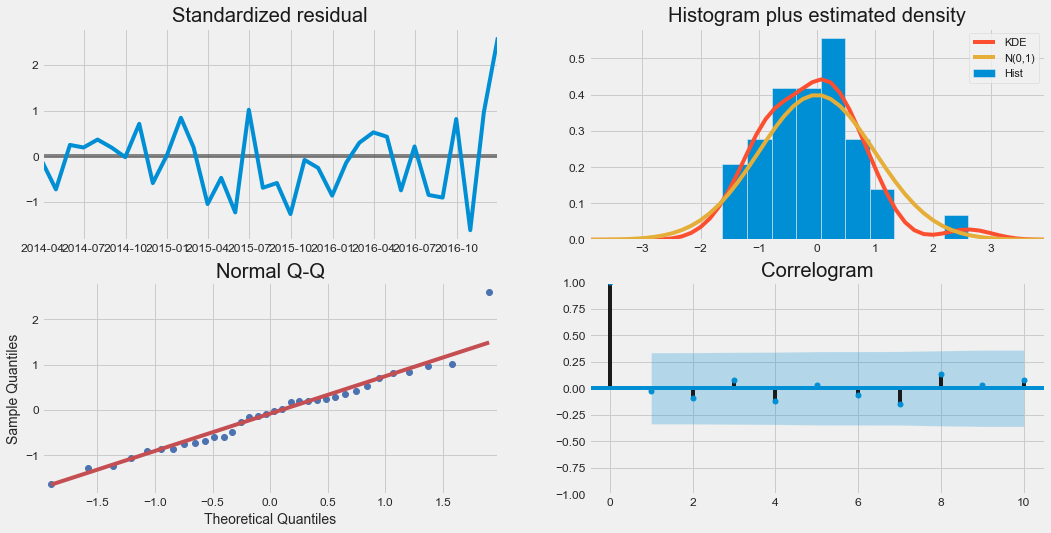

In [93]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

            lower Order_Demand  upper Order_Demand
2016-01-31        22474.323943        41356.981985
2016-02-29        22979.493275        41862.151315
2016-03-31        27760.444652        46643.102691
2016-04-30        20757.275297        39639.933336
2016-05-31        20663.905955        39546.563994
2016-06-30        24901.229826        43783.887865
2016-07-31        26098.464494        44981.122533
2016-08-31        21318.890921        40201.548960
2016-09-30        19891.958120        38774.616158
2016-10-31        29326.923630        48209.581668
2016-11-30        20937.578296        39820.236335
2016-12-31        21151.052298        40033.710336


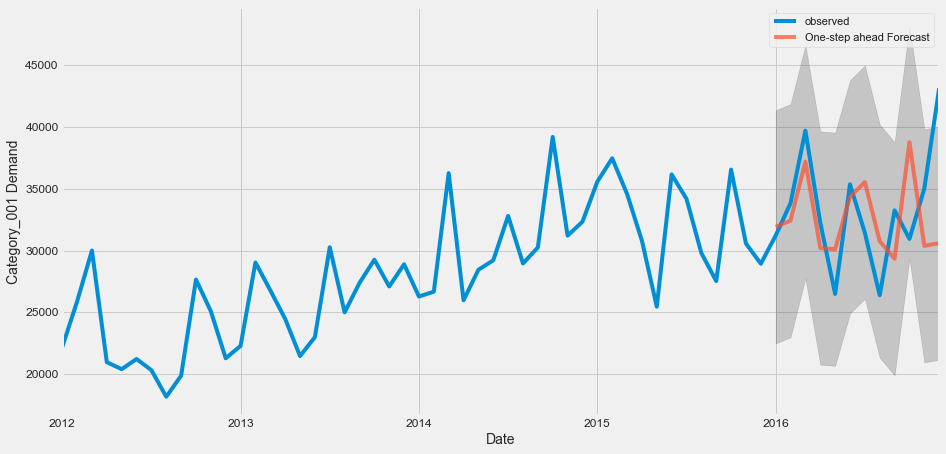

In [95]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Category_001 Demand')
plt.legend()
plt.show()

In [96]:
y_forecasted = pred.predicted_mean
print(y_forecasted)

2016-01-31    31915.652964
2016-02-29    32420.822295
2016-03-31    37201.773671
2016-04-30    30198.604317
2016-05-31    30105.234974
2016-06-30    34342.558846
2016-07-31    35539.793513
2016-08-31    30760.219940
2016-09-30    29333.287139
2016-10-31    38768.252649
2016-11-30    30378.907315
2016-12-31    30592.381317
Freq: M, dtype: float64


In [101]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 26571543.23
The Root Mean Squared Error of our forecasts is 5154.76
The Root Mean Squared Error of our forecasts is 5154.76


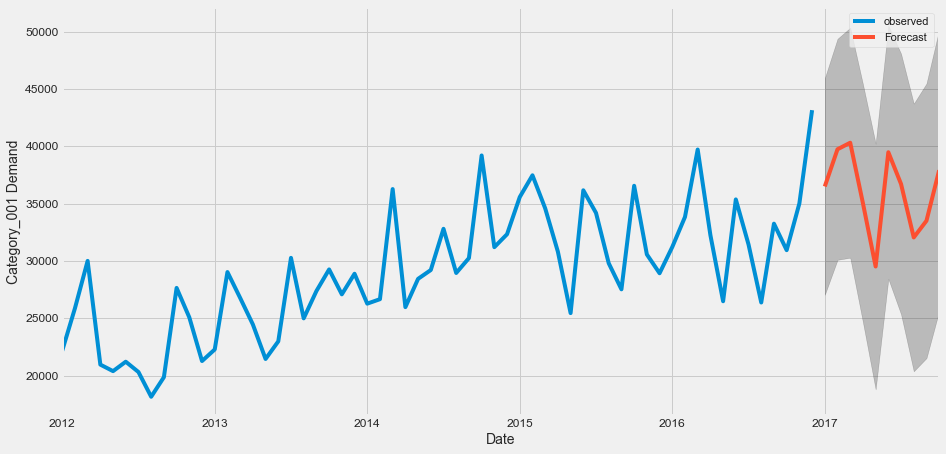

            lower Order_Demand  upper Order_Demand
2017-01-31        27050.951196        45933.609234
2017-02-28        30097.029363        49368.256183
2017-03-31        30284.236828        50327.716679
2017-04-30        24666.151908        45405.394421
2017-05-31        18806.767145        40224.218621
2017-06-30        28440.690411        50514.982976
2017-07-31        25349.159843        48061.363461
2017-08-31        20379.937137        43712.611716
2017-09-30        21530.837858        45467.906287
2017-10-31        25642.865101        50169.438107


In [104]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Category_001 Demand')
plt.legend()
plt.show()
print(pred_ci)
print(pred_uc)

In [ ]:
#'Category_001', 'Category_002', 'Category_003', 'Category_004', 'Category_005', 'Category_006', 'Category_007', 
#'Category_008', 'Category_009', 'Category_010', 'Category_011', 'Category_012', 'Category_013', 'Category_014', 
#'Category_015', 'Category_016', 'Category_017', 'Category_018', 'Category_019', 'Category_020', 'Category_021', 
#'Category_022', 'Category_023', 'Category_024','Category_025', 'Category_026', 'Category_027', 'Category_028', 
#'Category_029', 'Category_030', 'Category_031', 'Category_032', 'Category_033', 

Category_001 = df.loc[df['Product_Category'] == 'Category_001']
Category_002 = df.loc[df['Product_Category'] == 'Category_002']
Category_003 = df.loc[df['Product_Category'] == 'Category_003']
Category_004 = df.loc[df['Product_Category'] == 'Category_004']
Category_005 = df.loc[df['Product_Category'] == 'Category_005']
Category_006 = df.loc[df['Product_Category'] == 'Category_006']
Category_007 = df.loc[df['Product_Category'] == 'Category_007']
Category_008 = df.loc[df['Product_Category'] == 'Category_008']
Category_009 = df.loc[df['Product_Category'] == 'Category_009']
Category_010 = df.loc[df['Product_Category'] == 'Category_010']
Category_011 = df.loc[df['Product_Category'] == 'Category_011']
Category_012 = df.loc[df['Product_Category'] == 'Category_012']
Category_013 = df.loc[df['Product_Category'] == 'Category_013']
Category_014 = df.loc[df['Product_Category'] == 'Category_014']
Category_015 = df.loc[df['Product_Category'] == 'Category_015']
Category_016 = df.loc[df['Product_Category'] == 'Category_016']
Category_017 = df.loc[df['Product_Category'] == 'Category_017']
Category_018 = df.loc[df['Product_Category'] == 'Category_018']
Category_019 = df.loc[df['Product_Category'] == 'Category_019']
Category_020 = df.loc[df['Product_Category'] == 'Category_020']
Category_021 = df.loc[df['Product_Category'] == 'Category_021']
Category_022 = df.loc[df['Product_Category'] == 'Category_022']
Category_023 = df.loc[df['Product_Category'] == 'Category_023']
Category_024 = df.loc[df['Product_Category'] == 'Category_024']
Category_025 = df.loc[df['Product_Category'] == 'Category_025']
Category_026 = df.loc[df['Product_Category'] == 'Category_026']
Category_027 = df.loc[df['Product_Category'] == 'Category_027']
Category_028 = df.loc[df['Product_Category'] == 'Category_028']
Category_029 = df.loc[df['Product_Category'] == 'Category_029']
Category_030 = df.loc[df['Product_Category'] == 'Category_030']
Category_031 = df.loc[df['Product_Category'] == 'Category_031']
Category_032 = df.loc[df['Product_Category'] == 'Category_032']
Category_033 = df.loc[df['Product_Category'] == 'Category_033']

Category_001.shape, Category_002.shape, Category_003.shape, Category_004.shape, Category_005.shape, Category_006.shape, Category_007.shape, Category_008.shape, Category_009.shape, Category_010.shape, Category_011.shape, Category_012.shape, Category_013.shape, Category_014.shape, Category_015.shape, Category_016.shape, Category_017.shape, Category_018.shape, Category_019.shape, Category_020.shape, Category_021.shape, Category_022.shape, Category_023.shape, Category_024.shape, Category_025.shape, Category_026.shape, Category_027.shape, Category_028.shape, Category_029.shape, Category_030.shape, Category_031.shape, Category_032.shape, Category_033.shape,






In [ ]:
cols = [ 'Product_Code', 'Warehouse', 'Product_Category']
Category_001.drop(cols, axis=1, inplace=True)
Category_003.drop(cols, axis=1, inplace=True)

Category_001 = Category_001.sort_values('Date')
Category_003 = Category_003.sort_values('Date')

Category_001 = Category_001.groupby('Date')['Order_Demand'].sum().reset_index()
Category_003 = Category_003.groupby('Date')['Order_Demand'].sum().reset_index()

Category_001 = Category_001.set_index('Date')
Category_003 = Category_003.set_index('Date')

y_001 = Category_001['Order_Demand'].resample('MS').mean()
y_003 = Category_003['Order_Demand'].resample('MS').mean()

Category_001 = pd.DataFrame({'Date':y_001.index, 'Order_Demand':y_001.values})
Category_003 = pd.DataFrame({'Date': y_003.index, 'Order_Demand': y_003.values})

#category = Category_001.merge(Category_003, how='inner', on='Date')
#category.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
#category.head()